### Baseline : prédire la valeur du meme jour de la semaine de la semaine d'avant

In [3]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

df_washington = pd.read_csv("data/washington.csv", sep = ";")
# df_convention = pd.read_csv("data/convention.csv", sep = ";")
# df_sts = pd.read_csv("data/sts.csv", sep = ";")

def filter(df,amont,aval):
    df = df[df["Libelle noeud amont"]==amont]
    df = df[df["Libelle noeud aval"]==aval]
    return df

def set_date(df):
    df["Date et heure de comptage"] = pd.to_datetime(df_washington["Date et heure de comptage"],format='%Y-%m-%dT%H:%M:%S%z')
    return df


df_washington = filter(df_washington,"Av_Champs_Elysees-Washington","Av_Champs_Elysees-Berri")
df_washington = set_date(df_washington)
# df_sts = filter(df_sts,"Lecourbe-Convention","Convention-Blomet")
# df_convention = filter(df_convention,"Sts_Peres-Voltaire","Sts_Peres-Universite")

def simplify_df(df):
    df_loc = df[["Libelle", "Date et heure de comptage", "Débit horaire", "Taux d'occupation"]]
    return df_loc

df_washington = simplify_df(df_washington)

df_washington["date"] = [d.date() for d in df_washington["Date et heure de comptage"]]
df_washington["heure"] = [d.hour for d in df_washington["Date et heure de comptage"]]

df_washington.head()

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,date,heure
0,AV_Champs_Elysees,2020-11-02 05:00:00+01:00,144.0,2.25611,2020-11-02,5
1,AV_Champs_Elysees,2020-11-01 23:00:00+01:00,245.0,8.11222,2020-11-01,23
2,AV_Champs_Elysees,2020-07-01 16:00:00+02:00,1138.0,17.86611,2020-07-01,16
3,AV_Champs_Elysees,2020-07-01 22:00:00+02:00,880.0,16.03611,2020-07-01,22
4,AV_Champs_Elysees,2020-08-05 03:00:00+02:00,487.0,6.35389,2020-08-05,3


In [4]:
def baseline_2(df, start_date, end_date):
    """
    input :
    
    df : dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all historic rows
    
    start_date : datetime.date (format datetime.date(YYYY, MM, DD))
    end_date : datetime.date (format datetime.date(YYYY, MM, DD))
    
    output :
    dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all hours between start_date and end_date
    
    
    Logic :
    Last day values are predicted to be the ones happening 7 days before
    Predicting 10/09/2020 is the values of 03/09/2020
    """
    number_of_days = (end_date - start_date).days
    
    df_prediction = df[df["date"] == start_date - datetime.timedelta(days=7)].copy()
    df_prediction["date"] = start_date
    
    local_date = start_date
    for i in range(number_of_days):
        local_date += datetime.timedelta(days=1)
        df_loc = df[df["date"] == local_date - datetime.timedelta(days=7)].copy()
        df_loc["date"] = local_date
        df_prediction = pd.concat([df_prediction, df_loc])
    return df_prediction

In [55]:
def baseline_3(df, start_date, end_date):
    """
    input :
    
    df : dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all historic rows
    
    start_date : datetime.date (format datetime.date(YYYY, MM, DD))
    end_date : datetime.date (format datetime.date(YYYY, MM, DD))
    
    output :
    dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all hours between start_date and end_date
    
    
    Logic :
    Last day values are predicted to be the means of the ones 7 days and 14 days before
    Predicting 10/09/2020 is the values of 03/09/2020
    """
    number_of_days = (end_date - start_date).days
    
    df_prediction = df[df["date"] == start_date - datetime.timedelta(days=7)].copy()
    df_prediction["date"] = start_date
    
    df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
    df_14["date"] = start_date
    
    df_prediction = pd.concat([df_prediction, df_14])
    
    local_date = start_date
    for i in range(number_of_days):
        local_date += datetime.timedelta(days=1)
        df_loc = df[df["date"] == local_date - datetime.timedelta(days=7)].copy()
        df_loc["date"] = local_date
        
        df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
        df_14["date"] = local_date
        
        df_loc = pd.concat([df_loc, df_14])
        
        df_prediction = pd.concat([df_prediction, df_loc])
    
    df_prediction = df_prediction.groupby(by=["date", "heure"]).mean().reset_index()    
    return df_prediction

In [71]:
def baseline_4(df, start_date, end_date):
    """
    input :
    
    df : dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all historic rows
    
    start_date : datetime.date (format datetime.date(YYYY, MM, DD))
    end_date : datetime.date (format datetime.date(YYYY, MM, DD))
    
    output :
    dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all hours between start_date and end_date
    
    
    Logic :
    Last day values are predicted to be the means of the ones 7 days and 14 days before
    Predicting 10/09/2020 is the values of 03/09/2020
    """
    number_of_days = (end_date - start_date).days
    
    df_prediction = df[df["date"] == start_date - datetime.timedelta(days=7)].copy()
    df_prediction["date"] = start_date
    
    df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
    df_14["date"] = start_date
    
    df_21 = df[df["date"] == start_date - datetime.timedelta(days=21)].copy()
    df_21["date"] = start_date
    
    df_prediction = pd.concat([df_prediction, df_14, df_21])
    
    local_date = start_date
    for i in range(number_of_days):
        local_date += datetime.timedelta(days=1)
        df_loc = df[df["date"] == local_date - datetime.timedelta(days=7)].copy()
        df_loc["date"] = local_date
        
        df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
        df_14["date"] = local_date
        
        df_21 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
        df_21["date"] = local_date
        
        df_loc = pd.concat([df_loc, df_14, df_21])
        
        df_prediction = pd.concat([df_prediction, df_loc])
    
    df_prediction = df_prediction.groupby(by=["date", "heure"]).mean().reset_index()    
    return df_prediction

In [92]:
def modify_column(df, alpha):
    df_loc = df.copy()
    df_loc["Taux d'occupation"] = df_loc["Taux d'occupation"] * alpha
    df_loc["Débit horaire"] = df_loc["Débit horaire"] * alpha
    return df_loc

In [93]:
def baseline_5(df, start_date, end_date, coeffs=[0.7, 0.2, 0.1]):
    """
    input :
    
    df : dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all historic rows
    
    start_date : datetime.date (format datetime.date(YYYY, MM, DD))
    end_date : datetime.date (format datetime.date(YYYY, MM, DD))
    
    output :
    dataframe 
    - with columns : [Libelle, Date et heure de comptage, Débit horaire, Taux d'occupation, date]
    - with all hours between start_date and end_date
    
    
    Logic :
    Last day values are predicted to be the means of the ones 7 days and 14 days before
    Predicting 10/09/2020 is the values of 03/09/2020
    """
    [a, b, c] = coeffs
    number_of_days = (end_date - start_date).days
    
    df_prediction = df[df["date"] == start_date - datetime.timedelta(days=7)].copy()
    df_prediction["date"] = start_date
    
    df_prediction = modify_column(df_prediction, a)
    
    df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
    df_14["date"] = start_date
    
    df_14 = modify_column(df_14, b)
    
    df_21 = df[df["date"] == start_date - datetime.timedelta(days=21)].copy()
    df_21["date"] = start_date
    
    df_21 = modify_column(df_21, c)
    
    df_prediction = pd.concat([df_prediction, df_14, df_21])
    
    local_date = start_date
    for i in range(number_of_days):
        local_date += datetime.timedelta(days=1)
        df_loc = df[df["date"] == local_date - datetime.timedelta(days=7)].copy()
        df_loc["date"] = local_date
        
        df_loc = modify_column(df_loc, a)
        
        df_14 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
        df_14["date"] = local_date
        
        df_14 = modify_column(df_14, b)
        
        df_21 = df[df["date"] == start_date - datetime.timedelta(days=14)].copy()
        df_21["date"] = local_date
        
        df_21 = modify_column(df_21, c)
        
        df_loc = pd.concat([df_loc, df_14, df_21])
        
        df_prediction = pd.concat([df_prediction, df_loc])
    
    df_prediction = df_prediction.groupby(by=["date", "heure"]).sum().reset_index()    
    return df_prediction

In [94]:
min_date = datetime.date(2020, 6, 1)
max_date = datetime.date(2020, 6, 30)

In [96]:
df4 = baseline_5(df_washington, min_date, max_date)
df3 = baseline_3(df_washington, min_date, max_date)
df2 = baseline_2(df_washington, min_date, max_date)
df1 = df_washington[(df_washington["date"] >= min_date) & (df_washington["date"] <= max_date)]
df1 = df1.sort_values(by=["date", "heure"])
df2 = df2.sort_values(by=["date", "heure"])
df3 = df3.sort_values(by=["date", "heure"])
df4 = df4.sort_values(by=["date", "heure"])

No handles with labels found to put in legend.


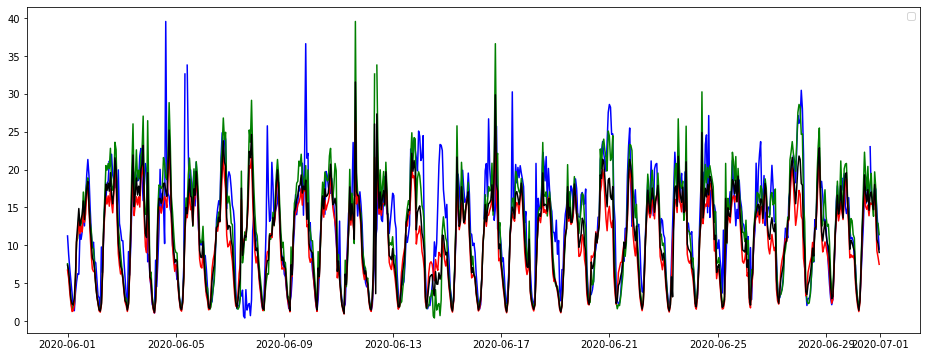

In [97]:
fig = plt.figure(figsize=(16, 6))
plt.plot(df1["Date et heure de comptage"], df1["Taux d'occupation"], color="blue")
plt.plot(df1["Date et heure de comptage"], df2["Taux d'occupation"], color="green")
plt.plot(df1["Date et heure de comptage"], df3["Taux d'occupation"], color="red")
plt.plot(df1["Date et heure de comptage"], df4["Taux d'occupation"], color="black")
plt.legend()

No handles with labels found to put in legend.


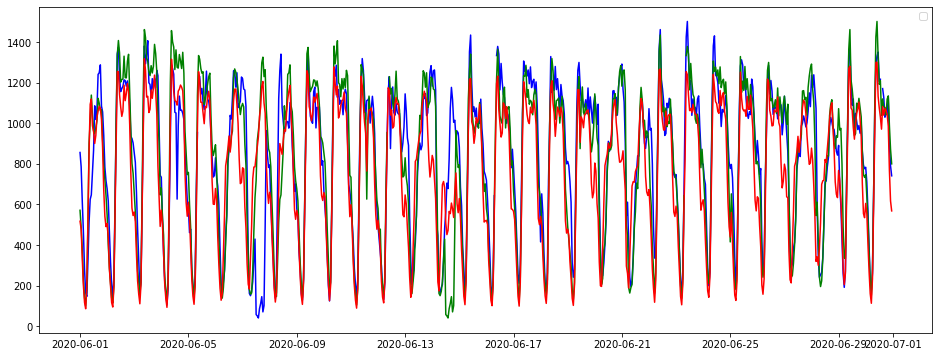

In [98]:
fig = plt.figure(figsize=(16, 6))
plt.plot(df1["Date et heure de comptage"], df1["Débit horaire"], color="blue")
plt.plot(df1["Date et heure de comptage"], df2["Débit horaire"], color="green")
plt.plot(df1["Date et heure de comptage"], df3["Débit horaire"], color="red")
plt.legend()

In [99]:
print("For first naive\n")
Y_debit = df1.interpolate()["Débit horaire"]
Y_debit_pred = df2.interpolate()["Débit horaire"]
print(f"MSE {mean_squared_error(Y_debit, Y_debit_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_debit, Y_debit_pred))}")

Y_taux = df1.interpolate()["Taux d'occupation"]
Y_taux_pred = df2.interpolate()["Taux d'occupation"]
print(f"MSE {mean_squared_error(Y_taux, Y_taux_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_taux, Y_taux_pred))}")

For first naive

MSE 37641.183333333334
RMSE 194.01335864659768
MSE 24.67237859733066
RMSE 4.967129814825727


In [100]:
print("For second naive")
Y_debit = df1.interpolate()["Débit horaire"]
Y_debit_pred = df3.interpolate()["Débit horaire"]
print(f"MSE {mean_squared_error(Y_debit, Y_debit_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_debit, Y_debit_pred))}")

Y_taux = df1.interpolate()["Taux d'occupation"]
Y_taux_pred = df3.interpolate()["Taux d'occupation"]
print(f"MSE {mean_squared_error(Y_taux, Y_taux_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_taux, Y_taux_pred))}")

For second naive
MSE 50879.25208333333
RMSE 225.5642970049412
MSE 26.7201420601834
RMSE 5.169152934493561


In [101]:
print("For third naive")
Y_debit = df1.interpolate()["Débit horaire"]
Y_debit_pred = df4.interpolate()["Débit horaire"]
print(f"MSE {mean_squared_error(Y_debit, Y_debit_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_debit, Y_debit_pred))}")

Y_taux = df1.interpolate()["Taux d'occupation"]
Y_taux_pred = df4.interpolate()["Taux d'occupation"]
print(f"MSE {mean_squared_error(Y_taux, Y_taux_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(Y_taux, Y_taux_pred))}")

For third naive
MSE 40513.00440277778
RMSE 201.27842508023005
MSE 22.894600688531323
RMSE 4.784830267473583
